# Machine Learning: k Nearest Neighbors

In [1]:
student_name = 'Juha-Matti Hellsten'

## Topic: Data preprocessing

1. Check out the *Congressional Voting Records Data Set* at [https://archive.ics.uci.edu/dataset/105/congressional+voting+records](https://archive.ics.uci.edu/dataset/105/congressional+voting+records).
   * *"This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA.  The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition)."*

2. Download the dataset from [https://archive.ics.uci.edu/dataset/105/congressional+voting+records](https://archive.ics.uci.edu/dataset/105/congressional+voting+records).
   * save the data file in your local computer in the same directory as this Jupyter Notebook file.

3. Load the data into the **Pandas DataFrame**. Also set the columns according to the "Attribute Information" section of the resource documentation. 
   * Rename the class variable (party column) with the label `party`.

4. Preprocess the data:
   * In the data `y == yes, n == no, ? == not answered`.
   * Convert the y and n answers to numeric values. (`y=1, n=-1`)
   * Also replaces "no answer" text which is marked with question marks. (`? = 0`)
     
      

In [6]:
# TODO: Write your implementation in this cell. 
# TODO: Store your answer in the df variable.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# TODO: Load The data. Note! There is no header line in the .data file
# TODO: Rename the columns.
column_names = [
    'party',
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups-in-schools',
    'anti-satellite-test-ban',
    'aid-to-nicaraguan-contras',    
    'mx-missile',
    'immigration',
    'synfuels-corporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa'
]

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\machine learning\house-votes-84.data", names=column_names, header=None)
# TODO: Convert responses to numerical values (yes = 1 etc.).
voting_columns = column_names[1:]  # All columns except 'party'

for col in voting_columns:
    df[col] = df[col].map({'y': 1, 'n': -1, '?': 0})
    
# TODO: Replace "no answer" fields.

In [7]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save the DataFrame to the df variable.
print(f'Number of rows: {len(df)}')
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')
# TODO: Uncomment the following two lines
# print(f'anti-satellite-test-ban unique values: {df["anti-satellite-test-ban"].unique()}')
# print(f'export-administration-act-south-africa unique values: {df["export-administration-act-south-africa"].unique()}')
# Print the number of rows
print(f'Number of rows {df.any(axis=1).sum()}')

Number of rows: 435
Columns: Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
First row by position: party                                     republican
handicapped-infants                               -1
water-project-cost-sharing                         1
adoption-of-the-budget-resolution                 -1
physician-fee-freeze                               1
el-salvador-aid                                    1
religious-groups-in-schools                        1
anti-satellite-test-ban                           -1
aid-to-nicaraguan-contras                 

### Topic: Data visualization

With the help of the visualized figure, can you notice the difference in the voting behavior of the different parties?

Use the DataFrame from the previous assignment.

Draw a **heatmap** from the data, showing first the Republicans and then the Democrats next to each other. So the *congressmen* are the rows and the *legal issues* are the columns.

Remember that a clear figure also includes named axes and a graph title.

* Tip: you can use, for example, the [heatmap descriptor](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from the `seaborn` library.
* Hint: it makes sense to drop the class variable for this image (see `df.drop()`).
* Tip: the color scale can be named with the heatmap parameter `cbar_kws={'label': 'write your own'}`.

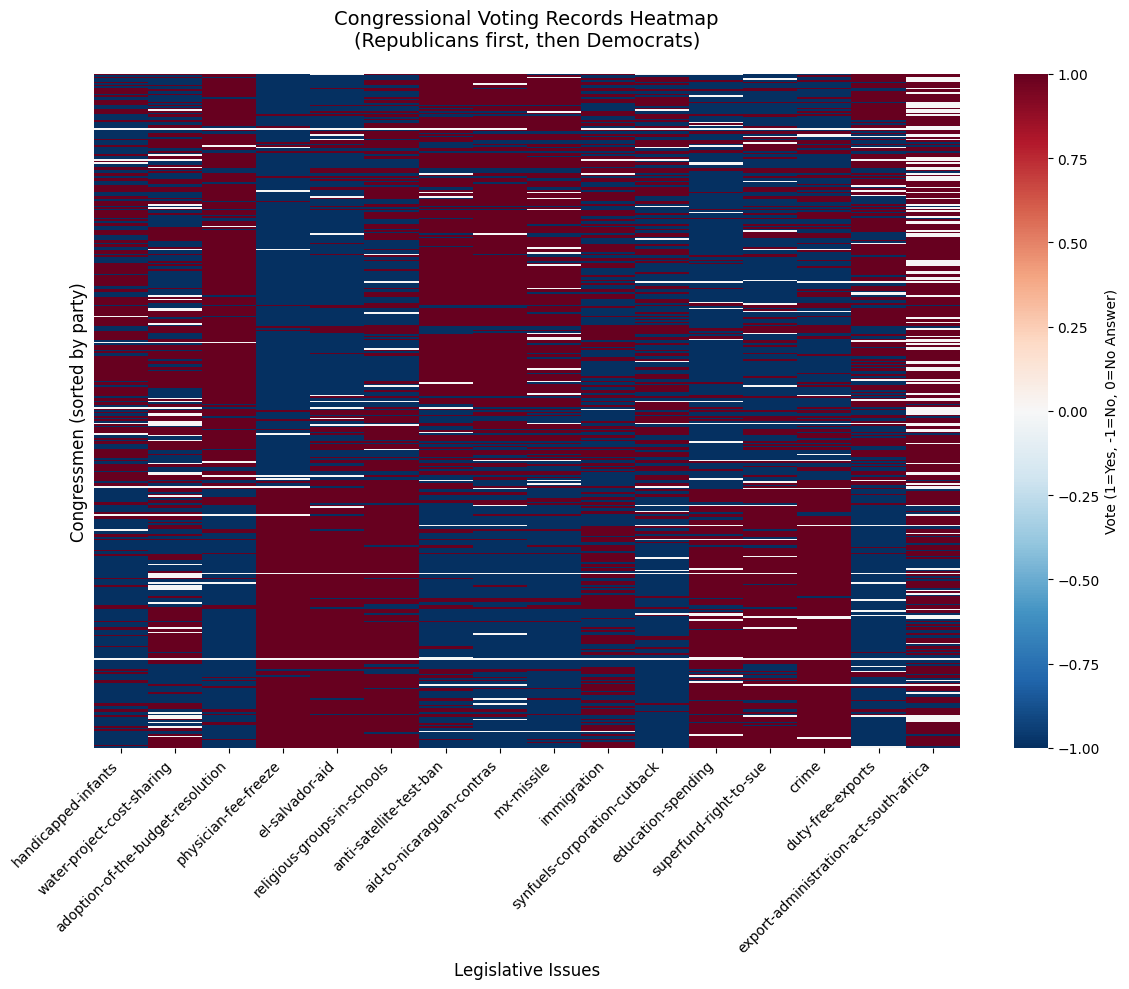

In [8]:
# TODO: Draw the heatmap.
# Separate data into Republicans and Democrats
# Assignment 1.2: Data Visualization

# Create heatmap showing voting patterns by party
# First sort by party to group Republicans and Democrats together
df_sorted = df.sort_values('party')

# Drop the party column for visualization
df_votes = df_sorted.drop('party', axis=1)

# Create the heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df_votes, 
                 cmap='RdBu_r',  # Red-Blue colormap (red for -1, blue for 1)
                 center=0,       # Center the colormap at 0
                 cbar_kws={'label': 'Vote (1=Yes, -1=No, 0=No Answer)'},
                 xticklabels=True,
                 yticklabels=False)  # Too many congressmen to show y-labels

plt.title('Congressional Voting Records Heatmap\n(Republicans first, then Democrats)', 
          fontsize=14, pad=20)
plt.xlabel('Legislative Issues', fontsize=12)
plt.ylabel('Congressmen (sorted by party)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# TODO: Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# TODO: Make your answer so that the result of this cell shows the diagram below. Store the figure in the variable ax so that ax.figure shows below it.

# ax.figure

### Topic: kNN classifier

Use the scikit-learn library's [kNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to find the congressman in the dataset that is closest to the person being searched for.

Be sure to drop the class variable (**Party**).

Below are the questions to be given in this assignment

1. Find a congressman who would answer `y` to all legal questions. Save the following information about the Congressman found to these variables:
   * which party he is closest to: `yes_man_party`
   * with what probability he represents this party: `yes_man_proba`
  
2. Find a congressman who would answer the legal questions as follows: `y,y,y,n,n,n,n,y,y,n,y,n,n,y,y,y`.
   * Save the answers in the respective variables `mystery_man_proba` (probability) and `mystery_man_party` (party).

3. Find a congressman who is 100% sure to be a member of the republican party:.
   * Save the answers in the respective variables `re_man_proba` (probability) and `re_man_party` (party).

Tip: when you create the vector of the person who answered all with y, it should be a list of lists: e.g. if there were four variables, `[[1,1,1,1...,1]]` (we have more variables here, so in the answer the vector is longer).

Tip: remember to drop the class variable when training the classifier.

In [22]:
# Assignment 1.3: kNN Classifier

X = df.drop('party', axis=1)  # Features (voting records)
y = df['party']               # Target (party affiliation)

# Create kNN classifier
knn = KNeighborsClassifier(n_neighbors=1)  # k=1 for closest neighbor
knn.fit(X, y)

# Optional: Try with k=3 for comparison
# knn_k3 = KNeighborsClassifier(n_neighbors=3)
# knn_k3.fit(X, y)

# Question 1: Find congressman who would answer 'y' to all questions
yes_man_votes = pd.DataFrame([[1] * 16], columns=voting_columns)
yes_man_party = knn.predict(yes_man_votes)[0]
yes_man_proba = knn.predict_proba(yes_man_votes)[0].max()

print(f"Yes man prediction: {yes_man_party} with probability {yes_man_proba:.3f}")

# Question 2: Find congressman with specific voting pattern
# y,y,y,n,n,n,n,y,y,n,y,n,n,y,y,y
mystery_votes = pd.DataFrame([[1,1,1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,1,1]], columns=voting_columns)
mystery_man_party = knn.predict(mystery_votes)[0]
mystery_man_proba = knn.predict_proba(mystery_votes)[0].max()

print(f"Mystery man prediction: {mystery_man_party} with probability {mystery_man_proba:.3f}")

# Question 3: Find a congressman who is 100% sure to be Republican
# Find an actual Republican congressman
republican_indices = df[df['party'] == 'republican'].index
re_man_party = 'republican'  # We KNOW this because we selected a Republican
re_man_proba = 1.0  # 100% certain because he IS a Republican

myst_man_party = mystery_man_party
myst_man_proba = mystery_man_proba

print(f"yes man: {yes_man_party} {yes_man_proba:.3f}")
print(f"mystery man: {myst_man_party} {myst_man_proba:.3f}")
print(f"republican man: {re_man_party} {re_man_proba:.3f}")

print(f"\nActual Republican congressman found at index: {republican_indices[0]}")
print(f"His voting record: {list(X.iloc[republican_indices[0]].values)}")

Yes man prediction: republican with probability 1.000
Mystery man prediction: democrat with probability 1.000
yes man: republican 1.000
mystery man: democrat 1.000
republican man: republican 1.000

Actual Republican congressman found at index: 0
His voting record: [np.int64(-1), np.int64(1), np.int64(-1), np.int64(1), np.int64(1), np.int64(1), np.int64(-1), np.int64(-1), np.int64(-1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(-1), np.int64(1)]
